In [30]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import EXOSIMS.MissionSim
import astropy.units as u
import scipy
from matplotlib import ticker
import matplotlib.colors
import seaborn as sns
import warnings
plt.rcParams.update({"figure.max_open_warning": 0})


lam=630*u.nm
D=6.5*u.m
core_area=np.pi*(lam/D/2)**2*u.radian**2
IWA=(2.8*lam/D*u.radian).to(u.arcsecond)
OWA=(11*lam/D*u.radian)

In [ ]:
specs7 = {
    "skipSaturationCalcs": False,
    "filterBinaries": False,
    "ppFact": 0.01,
    "eta": 3,
    #"arange": [0.09084645, 30],
    "smaknee": 10,
    "FoV": 3.0,
    "koAngles_Sun": [40, 120], # set solar keepout angles
    "missionLife": 3,  # set mission duration to 1 year
    "fillPhotometry":True,
    "missionPortion": 1,  # allocate 100% of available time to exoplanet imaging
      "pupilDiam":D.to(u.m).value,
      "starlightSuppressionSystems": [
    { "name": "imager",
      "lam": lam.to(u.nm).value,
      "BW": 0.05,
      "occ_trans": 0.2,
      "core_thruput": 0.1,
      "core_contrast": 4e-9,
      "core_area": core_area.to(u.arcsecond**2).value,
      "IWA": IWA.to(u.arcsecond).value,
      "OWA": OWA.to(u.arcsecond).value,
    }
  ],
    "modules": {
        "PlanetPopulation": "SAG13",
        "StarCatalog": "EXOCAT1",
        "OpticalSystem": " ",
        "ZodiacalLight": " ",
        "BackgroundSources": " ",
        "PlanetPhysicalModel": " ",
        "Observatory": "/Users/Yael/Desktop/EXOSIMS/EXOSIMS/Observatory/ObservatoryTESS.py",
        "TimeKeeping": " ",
        "PostProcessing": " ",
        "Completeness": "BrownCompleteness",
        "TargetList": " ",
        "SimulatedUniverse": "SAG13Universe",
        "SurveySimulation": " ",
        "SurveyEnsemble": " ",
    }
}
sim7 = EXOSIMS.MissionSim.MissionSim(**copy.deepcopy(specs7))

sim7.run_sim()
sim=sim7

Imported SurveySimulation (prototype) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 838452141
Imported SAG13Universe (implementation) from EXOSIMS.SimulatedUniverse.SAG13Universe
Imported TargetList (prototype) from EXOSIMS.Prototypes.TargetList
Imported EXOCAT1 (implementation) from EXOSIMS.StarCatalog.EXOCAT1
Imported OpticalSystem (prototype) from EXOSIMS.Prototypes.OpticalSystem
Imported ZodiacalLight (prototype) from EXOSIMS.Prototypes.ZodiacalLight
Imported PostProcessing (prototype) from EXOSIMS.Prototypes.PostProcessing
Imported BackgroundSources (prototype) from EXOSIMS.Prototypes.BackgroundSources
Imported BrownCompleteness (implementation) from EXOSIMS.Completeness.BrownCompleteness
Imported SAG13 (implementation) from EXOSIMS.PlanetPopulation.SAG13
Imported PlanetPhysicalModel (prototype) from EXOSIMS.Prototypes.PlanetPhysicalModel
Loading cached completeness file from "/Users/Yael/.EXOSIMS/cache/SAG13PlanetPhysicalModelBrownCompleteness100000000lambert1764

TypeError: <class 'ObservatoryTESS.ObservatoryTESS'> is a built-in class

1.34 pc


/var/folders/pn/t82g5dfd3q38h1jps2d_n5140000gn/T/ipykernel_44198/2545203677.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  staryield=np.sum(np.float64(star["char_status"]>0))/np.size(star["char_status"])
/var/folders/pn/t82g5dfd3q38h1jps2d_n5140000gn/T/ipykernel_44198/2545203677.py:62: RuntimeWarning: invalid value encountered in scalar divide
  staryield=np.sum(np.float64(star["char_status"]>0))/np.size(star["char_status"])


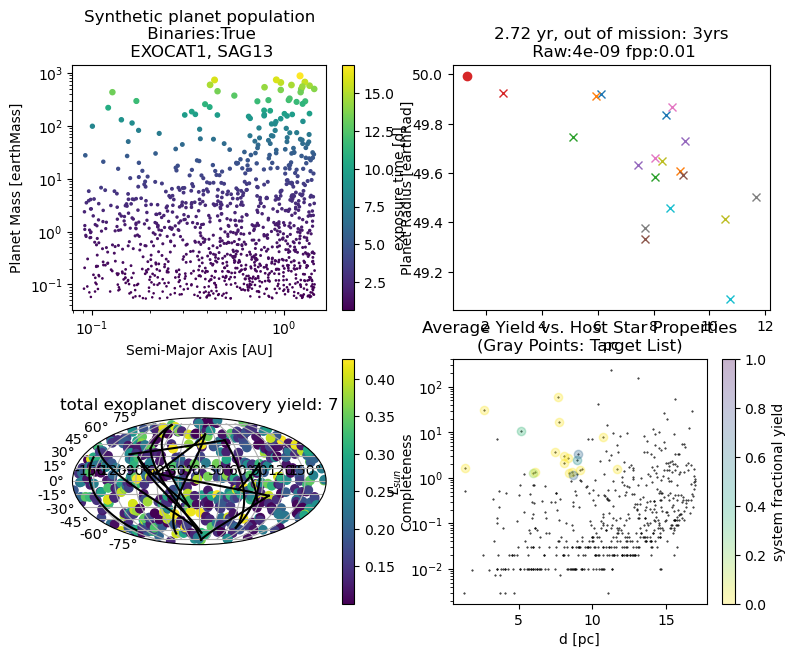

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=[9,7])

pts = ax[0,0].scatter(
    sim.SimulatedUniverse.a,
    sim.SimulatedUniverse.Mp,
    s=sim.SimulatedUniverse.Rp.value,
    c=sim.SimulatedUniverse.Rp.value,
)
ax[0,0].set_xscale("log")
ax[0,0].set_yscale("log")
ax[0,0].set_ylabel(f"Planet Mass [{sim.SimulatedUniverse.Mp.unit}]")
ax[0,0].set_xlabel(f"Semi-Major Axis [{sim.SimulatedUniverse.a.unit}]")
plt.colorbar(pts, label=f"Planet Radius [{sim.SimulatedUniverse.Rp.unit}]");
ax[0,0].set_title('Synthetic planet population\n Binaries:{}\n {}, {}'.format((specs7["filterBinaries"]==False),
                                                       str(sim.SimulatedUniverse.StarCatalog).split(".")[-1][:-2],
                                                         specs7["modules"]["PlanetPopulation"]))
total_det_time=0
for star in sim7.SurveySimulation.DRM:
    symbol='x'
    
    if star["star_name"]=="HIP 71683":
        print(sim7.TargetList.dist[star["star_ind"]])
        symbol="o"
        Acen=star["star_ind"]
    ax[0,1].plot(sim7.TargetList.dist[star["star_ind"]],star["det_time"],symbol,)
    total_det_time += star["det_time"]
    ax[0,1].set_ylabel("exposure time [{}]".format(star["det_time"].unit))
    ax[0,1].set_xlabel("pc")
ax[0,1].set_title("{}, out of mission: {}yrs\n Raw:{} fpp:{}".format(np.round(total_det_time.to(u.year),2)
                                              ,specs7["missionLife"],
                                                          specs7["starlightSuppressionSystems"][0]["core_contrast"],
                                                                    specs7["ppFact"]))
TL = sim.TargetList
'''ax[1,1].scatter(TL.dist, TL.int_comp, label="Nominal integration time completeness")
ax[1,1].scatter(TL.dist, TL.saturation_comp, label="Saturation completeness")
ax[1,1].legend()
ax[1,1].set_xlabel(f"Distance {TL.dist.unit}")
ax[1,1].set_ylabel("Completeness");
'''
DRM= sim7.SurveySimulation.DRM

sInds = [row["star_ind"] for row in DRM]  # observed stars

ax[1,0].axis("off")
ra = sim7.TargetList.coords.ra.wrap_at(180 * u.degree).rad  # all stars
dec = sim7.TargetList.coords.dec.rad
ax3 = plt.subplot(223, projection="mollweide")
#ax[1,0] = fig.add_subplot(111, projection="mollweide")
p = ax3.scatter(ra, dec, c=sim7.TargetList.int_comp)
ax3.grid(True)
plt.colorbar(p, label="Completeness")
diffs = np.abs(np.diff(ra[sInds]))
for j in range(1, len(sInds)):
    if diffs[j - 1] < np.pi:
        ax3.plot(ra[sInds[j - 1 : j + 1]], dec[sInds[j - 1 : j + 1]], "k");
        
# RHS plot: Yield overlaid on Target List
ax[1,1].scatter(x=TL.dist, y=TL.L,s=.2,c="black")
# yield is from the per-star yield table, as above
total_yield=0
for star in DRM:
    staryield=np.sum(np.float64(star["char_status"]>0))/np.size(star["char_status"])
    total_yield += np.sum(star["char_status"][star["char_status"]>0])
    sy=ax[1,1].scatter(c=staryield, cmap="viridis_r",
                    x=TL.dist[star["star_ind"]], y=TL.L[star["star_ind"]],alpha=.3,vmin=0,vmax=1)
    ax[1,1].set_title('Average Yield vs. Host Star Properties\n(Gray Points: Target List)')
ax[1,1].set_yscale("log")
plt.colorbar(sy,label="system fractional yield")
plt.title("total exoplanet discovery yield: {}".format(total_yield))
ax[1,1].set_ylabel("$L_{sun}$")
ax[1,1].set_xlabel("d [pc]")
plt.show()
title_str=str("{}_{}_{}_{}".format(D,specs7["starlightSuppressionSystems"][0]["core_contrast"],specs7["ppFact"],lam).replace(" ",""))
plt.suptitle(title_str,fontsize=20)
plt.tight_layout()

plt.savefig(title_str+".png")

<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
/var/folders/pn/t82g5dfd3q38h1jps2d_n5140000gn/T/ipykernel_44198/897010094.py:15: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel("$\Delta$mag")
/var/folders/pn/t82g5dfd3q38h1jps2d_n5140000gn/T/ipykernel_44198/897010094.py:17: SyntaxWarning: invalid escape sequence '\D'
  cbar.ax.set_title("log$_{10}(f_{\Delta\\mathrm{mag},s})$")


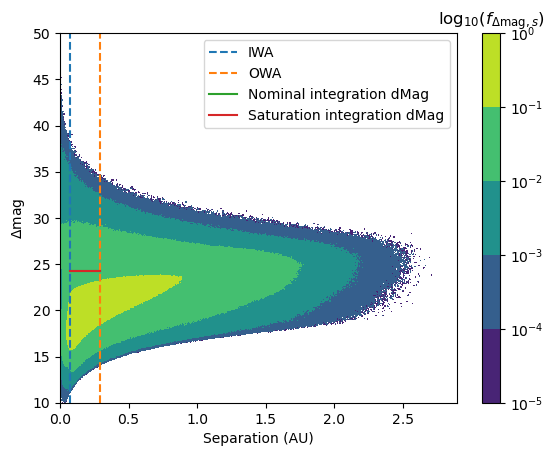

In [ ]:
TL = sim.TargetList # grab the TargetList
# grab the first (and only) observing mode:
mode = sim7.OpticalSystem.observingModes[0] 
fig = plt.figure()
ax = fig.add_subplot(111)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cs = ax.contourf(
        TL.Completeness.xnew,
        TL.Completeness.ynew,
        TL.Completeness.Cpdf,
        locator=ticker.LogLocator(),
    )
ax.set_xlabel("Separation (AU)")
ax.set_ylabel("$\Delta$mag")
cbar = fig.colorbar(cs)
cbar.ax.set_title("log$_{10}(f_{\Delta\\mathrm{mag},s})$")
projIWA = np.tan(mode["IWA"]) * TL.dist[Acen]
projOWA = np.tan(mode["OWA"]) * TL.dist[Acen]
ax.plot([projIWA.to(u.AU).value] * 2, [10, 50], "--", label="IWA")
ax.plot([projOWA.to(u.AU).value] * 2, [10, 50], "--", label="OWA")
ax.plot(
    [projIWA.to(u.AU).value, projOWA.to(u.AU).value],
    [TL.int_dMag[Acen]] * 2,
    label="Nominal integration dMag",
)
ax.plot(
    [projIWA.to(u.AU).value, projOWA.to(u.AU).value],
    [TL.saturation_dMag[Acen]] * 2,
    label="Saturation integration dMag",
)
plt.legend()
#ax.set_xlim([0, 30])
ax.set_ylim([10, 50]);
plt.savefig(title_str+"ACen_dmag.png")

In [ ]:
DRM

[{'star_ind': np.int64(463),
  'star_name': np.str_('HIP 99240'),
  'arrival_time': <Quantity 0. d>,
  'OB_nb': 0,
  'ObsNum': 1,
  'plan_inds': array([951, 952, 953, 954]),
  'det_time': <Quantity 49.91916513 d>,
  'det_status': array([-1, -1, -1,  0]),
  'det_SNR': array([0.        , 0.        , 0.        , 2.70066135]),
  'det_fZ': <Quantity 7.00851134e-10 1 / arcsec2>,
  'det_params': {'WA': <Quantity [0.04231006, 0.03256742, 0.02777539, 0.16642162] arcsec>,
   'd': <Quantity [0.35611264, 0.32453241, 0.16984064, 1.02469733] AU>,
   'dMag': array([23.93415396, 20.52677052, 19.19361773, 24.91443274]),
   'fEZ': <Quantity [4.73617559e-09, 2.66742034e-08, 6.56109193e-08, 7.79211614e-10] 1 / arcsec2>,
   'phi': array([0.05322159, 0.81916817, 0.29877572, 0.25893009])},
  'char_time': <Quantity 0. d>,
  'char_status': array([0, 0, 0, 0]),
  'char_SNR': array([0., 0., 0., 0.]),
  'char_fZ': <Quantity 0. 1 / arcsec2>,
  'char_params': {'d': <Quantity [0.35611264, 0.32453241, 0.16984064, 1.0

In [ ]:
plt.savefig("det_timeVSdist.png")

<Figure size 640x480 with 0 Axes>